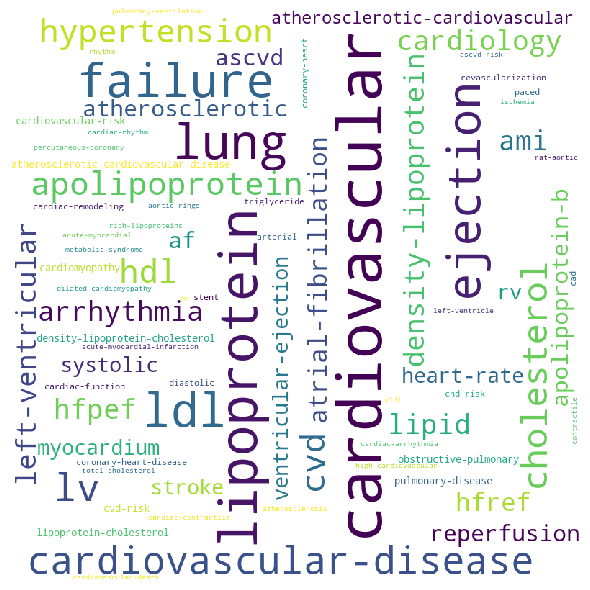

In [35]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

df = pd.read_csv("../Data/MutliKeywordDist.csv") 
alpha = df.loc[(df['ManRefVal'] >= .66)]
beta = df.loc[(df['ManRefVal'] >= .66) & (df['ManRefVal'] != 1)]
  
# iterate through the csv file 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                collocations=False,
                min_font_size = 10,
                regexp = '\w+(?:-\w+)*|\$[\d.]+|\S+').generate(" ".join(list(beta.Phrase.values))) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
#plt.show() 

plt.savefig('foo.png')
plt.savefig('foo.pdf')

In [1]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('../Data/GoogleNews-vectors-negative300.bin.gz', binary=True)

C:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [2]:
keys = ['Paris', 'Python', 'Sunday']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=5):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

MemoryError: 

In [2]:
keys = ['Paris', 'Python', 'Sunday']
import pickle 
filesave = 'embeddings_en_2d.pickle'
with open(filesave, 'rb') as fp:
    embeddings_en_2d = pickle.load(fp)
filesave = 'word_clusters.pickle'
with open(filesave, 'rb') as fp:
    word_clusters = pickle.load(fp)
filesave = 'embedding_clusters.pickle'
with open(filesave, 'rb') as fp:
    embedding_clusters = pickle.load(fp)

In [10]:
embedding_clusters = np.array(embedding_clusters)


In [21]:
n, m, k = embedding_clusters.shape
alpha = (embedding_clusters.reshape(n * m, k))
alpha.shape

(15, 200)

In [22]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k)))


In [29]:
embeddings_en_2d[:, 0]

array([  -7.4909773, -111.869446 ,  -62.766117 ,  -27.603153 ,
       -169.98305  ,  -63.903942 ,  -64.63451  , -120.727486 ,
         -3.976909 , -116.78186  , -167.90923  ,   26.47895  ,
        -48.201828 , -126.5748   ,  -77.315475 ], dtype=float32)

In [23]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# % matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, alpha=a)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'test_relation.png')


IndexError: too many indices for array

<Figure size 1152x648 with 0 Axes>

In [32]:
import pandas as pd
df = pd.read_csv("../Data/MutliKeywordDist.csv") 
alpha = df.loc[(df['ManRefVal'] >= .66)]
beta = df.loc[(df['ManRefVal'] >= .66) & (df['ManRefVal'] != 1)]
print(len(beta.Phrase.values))
keys = list(set(beta.Phrase.values))
print(len(keys))

536
196
